In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split

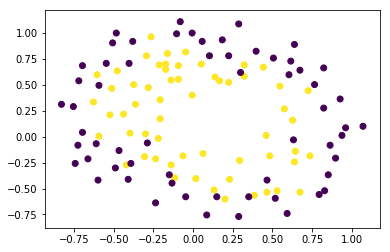

In [2]:
data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:,:-1]
y_data = data[:,-1]
    
plt.scatter(x_data[:,0],x_data[:,1],c=y_data) 
plt.show()

In [3]:
#分割数据
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data) 
model = tree.DecisionTreeClassifier(max_depth=7,min_samples_split=4)#最大深度; 最小可分数据
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

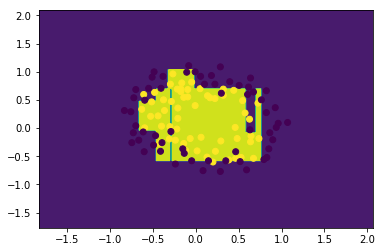

In [4]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = model.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [5]:
predictions = model.predict(x_train)
print(classification_report(predictions,y_train))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        46
         1.0       0.98      0.95      0.96        42

   micro avg       0.97      0.97      0.97        88
   macro avg       0.97      0.97      0.97        88
weighted avg       0.97      0.97      0.97        88



In [6]:
predictions = model.predict(x_test)
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67        11
         1.0       0.82      0.74      0.78        19

   micro avg       0.73      0.73      0.73        30
   macro avg       0.72      0.73      0.72        30
weighted avg       0.75      0.73      0.74        30



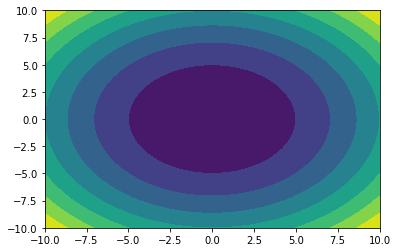

In [11]:
#画图 z = x**2 + y**2
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10,10,101)
y = np.linspace(-10,10,101)

#lim = np.arange(-2,2.1,0.1)
X,Y = np.meshgrid(x,y)#将原始数据变化成网格数据
Z1 = X**2 + Y**2#写入函数
plt.contourf(X,Y,Z1)
plt.show()

<a list of 2 text.Text objects>

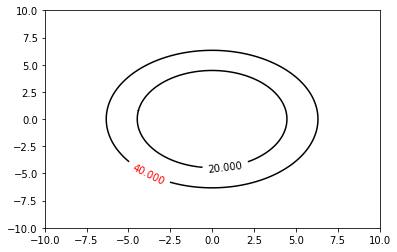

In [16]:
#输出20 和 40两条线
contour = plt.contour(X,Y,Z1,[20,40],colors='k')
plt.clabel(contour,fontsize=10,colors=('k','r'))